<a href="https://colab.research.google.com/github/maneeshb-prog/Demo_XYZ/blob/main/shopease_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Solution Notebook – ShopEase Business Analytics Case Study

This notebook provides the step-by-step solution for the ShopEase case study.

We will:
1. Load and explore the dataset
2. Perform descriptive statistics
3. Group and analyze data
4. Visualize insights
5. Conduct an A/B test between groups A and B

## Step 0: Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Display plots inline
%matplotlib inline

## Step 1: Load and Explore Dataset

In [ ]:
# Load the dataset
df = pd.read_csv("shopease_user_data.csv")

# Preview data
print(df.head())
print(df.info())
print(df.describe())

   user_id  age  gender     location  session_duration  pages_visited  \
0     1001   56  Female        Miami              18.7             13   
1     1002   46  Female  Los Angeles              22.0             10   
2     1003   32  Female        Miami              15.6              9   
3     1004   60    Male        Miami              19.8              3   
4     1005   25  Female        Miami               6.1              7   

   clicked_ad  purchase  amount_spent test_group  
0           0         0          0.00          B  
1           1         1        309.67          B  
2           1         1        344.70          B  
3           1         0          0.00          B  
4           0         0          0.00          A  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           300 non-null    int64  
 1   age 

## Step 2: Descriptive Statistics

In [ ]:
# Average session duration and pages visited
avg_session = df['session_duration'].mean()
avg_pages = df['pages_visited'].mean()

# Average purchase amount by gender
avg_purchase_gender = df.groupby('gender')['amount_spent'].mean()

# Overall conversion rate
conversion_rate = df['purchase'].mean() * 100

print("Average session duration:", avg_session)
print("Average pages visited:", avg_pages)
print("Average purchase amount by gender:\n", avg_purchase_gender)
print("Overall conversion rate (%):", conversion_rate)

Average session duration: 12.192
Average pages visited: 7.733333333333333
Average purchase amount by gender:
 gender
Female    80.601322
Male      81.237534
Other     77.684545
Name: amount_spent, dtype: float64
Overall conversion rate (%): 31.333333333333336


## Step 3: Group Analysis

In [ ]:
# Conversion by location
conversion_by_location = df.groupby('location')['purchase'].mean() * 100
print("Conversion rate by location:\n", conversion_by_location)

# Create age groups
bins = [18, 25, 35, 50, 61]
labels = ['18-25', '26-35', '36-50', '50+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

purchase_by_age = df.groupby('age_group')['purchase'].mean() * 100
print("\nPurchase rate by age group (%):\n", purchase_by_age)

# Gender-based averages
gender_time_pages = df.groupby('gender')[['session_duration','pages_visited']].mean()
print("\nAverage session duration & pages visited by gender:\n", gender_time_pages)

Conversion rate by location:
 location
Chicago        31.666667
Houston        30.769231
Los Angeles    24.193548
Miami          31.250000
New York       38.709677
Name: purchase, dtype: float64

Purchase rate by age group (%):
 age_group
18-25    32.692308
26-35    33.870968
36-50    22.857143
50+      39.506173
Name: purchase, dtype: float64

Average session duration & pages visited by gender:
         session_duration  pages_visited
gender                                 
Female         11.732231       7.619835
Male           12.417808       7.726027
Other          12.878788       8.181818


/tmp/ipython-input-2920288195.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_by_age = df.groupby('age_group')['purchase'].mean() * 100


## Step 4: Visualization

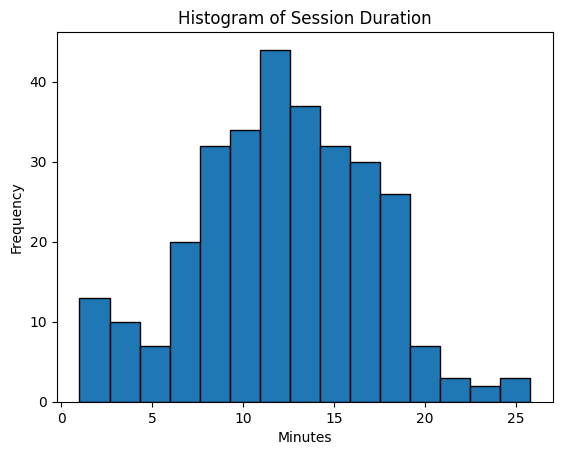

In [ ]:
# Histogram of session duration
plt.hist(df['session_duration'], bins=15, edgecolor='black')
plt.title("Histogram of Session Duration")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()

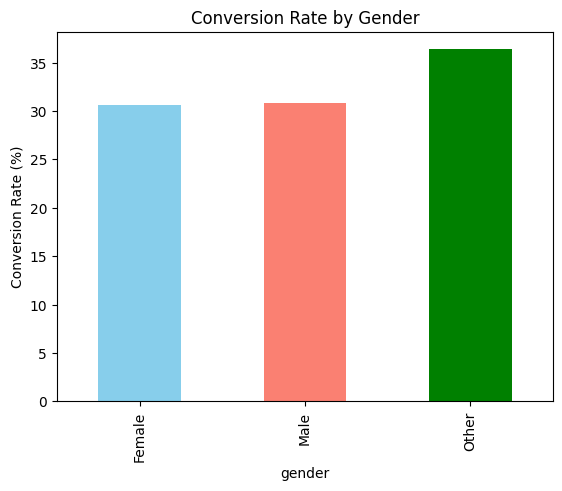

In [ ]:
# Bar chart of conversion rate by gender
conversion_by_gender = df.groupby('gender')['purchase'].mean() * 100
conversion_by_gender.plot(kind='bar', color=['skyblue','salmon','green'])
plt.title("Conversion Rate by Gender")
plt.ylabel("Conversion Rate (%)")
plt.show()

/tmp/ipython-input-1359231609.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_amount_by_age = df.groupby('age_group')['amount_spent'].mean()


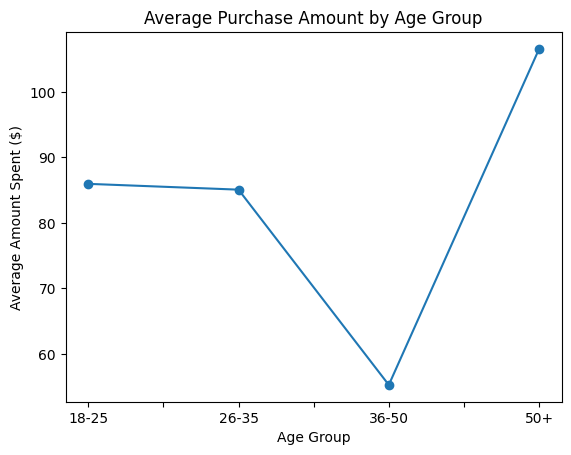

In [ ]:
# Line chart of average purchase amount by age group
avg_amount_by_age = df.groupby('age_group')['amount_spent'].mean()
avg_amount_by_age.plot(kind='line', marker='o')
plt.title("Average Purchase Amount by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Amount Spent ($)")
plt.show()

## Step 5: A/B Test

In [ ]:
# Compare stats between test groups
group_stats = df.groupby('test_group')[['session_duration','pages_visited','purchase']].mean()
group_stats['conversion_rate'] = group_stats['purchase'] * 100
print("Group stats (A vs B):\n", group_stats)

# T-test on conversion rates
groupA = df[df['test_group']=='A']['purchase']
groupB = df[df['test_group']=='B']['purchase']
t_stat, p_val = stats.ttest_ind(groupA, groupB)

print("\nA/B Test Results:")
print("t-statistic:", t_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("👉 Statistically significant difference found!")
else:
    print("👉 No significant difference found.")

Group stats (A vs B):
             session_duration  pages_visited  purchase  conversion_rate
test_group                                                            
A                  11.750932       7.975155  0.335404        33.540373
B                  12.702878       7.453237  0.287770        28.776978

A/B Test Results:
t-statistic: 0.885151541118224
p-value: 0.37678855603871075
👉 No significant difference found.
